['r' 'r' 'r' ... 'b' 'b' 'b']


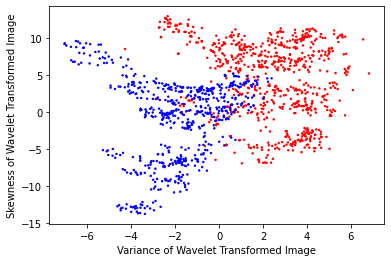

In [1]:
import numpy as np
import matplotlib.pyplot as plt





data = np.genfromtxt(r"C:\Users\Mark\Documents\IMPERIAL_YEAR_1\end_of_year_project\New folder\data_banknote_authentication.csv", delimiter=",", names=["x", "y", "z", "t", "u"])
categories=  np.array(["r", "b"])
print(categories[np.array([int(i) for i in data['u']])])
plt.scatter(data['x'], data['y'], s=2,c = categories[np.array([int(i) for i in data['u']])])
plt.xlabel('Variance of Wavelet Transformed Image')
plt.ylabel('Skewness of Wavelet Transformed Image')

plt.savefig('xandy.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(r"C:\Users\Mark\Documents\IMPERIAL_YEAR_1\end_of_year_project\New folder\data_banknote_authentication.csv", delimiter=",", names=["x", "y", "z", "t", "u"])
print(dataset)

            x         y        z        t  u
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]


In [5]:
dataset.head()

,x,y,z,t,u
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  11]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.91      0.94      0.92       124

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

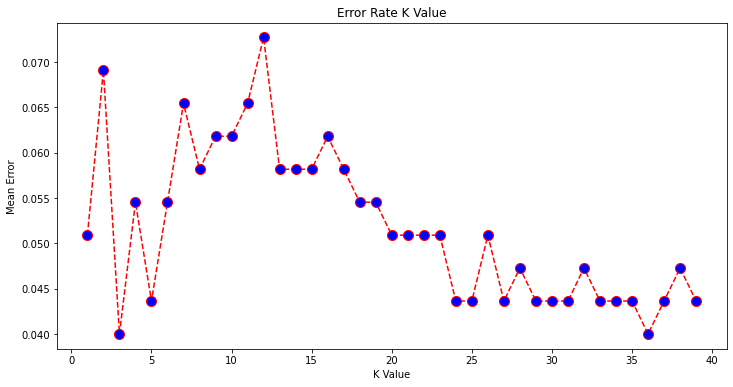

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

1372

In [15]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.8855685131195336


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9613702623906706


In [17]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(1372, 2)
(1372,)


In [18]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [19]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8670309653916212


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9289617486338798


In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9289617486338798


In [23]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 25)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9435336976320583, 0.930783242258652, 0.936247723132969, 0.9344262295081968, 0.9289617486338798, 0.9398907103825137, 0.9380692167577414, 0.9398907103825137, 0.9380692167577414, 0.9398907103825137, 0.9344262295081968, 0.9344262295081968, 0.930783242258652, 0.930783242258652, 0.930783242258652, 0.9289617486338798, 0.930783242258652, 0.930783242258652, 0.930783242258652, 0.9344262295081968, 0.9271402550091075, 0.930783242258652, 0.9253187613843351, 0.9271402550091075]


Text(0, 0.5, 'Testing Accuracy')

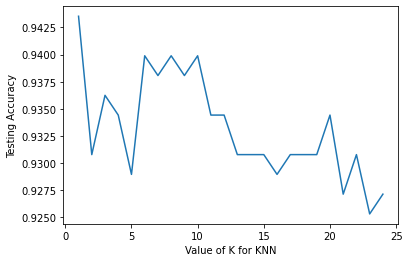

In [24]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Optimal regularization parameter : 0.02868316813342012


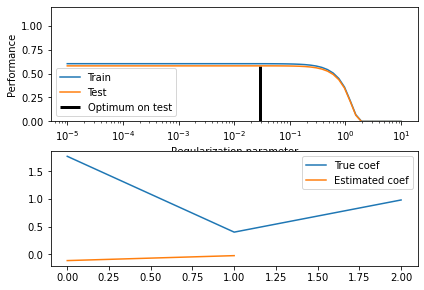

In [47]:
import numpy as np
from sklearn import linear_model
n_samples_train, n_samples_test, n_features = 780, 520, 3
np.random.seed(0)
coef = np.random.randn(n_features)

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

[0.0692167577413479, 0.06375227686703097, 0.06557377049180328, 0.07103825136612021, 0.060109289617486336, 0.061930783242258654, 0.060109289617486336, 0.061930783242258654, 0.060109289617486336, 0.06557377049180328, 0.06557377049180328, 0.0692167577413479, 0.0692167577413479, 0.0692167577413479, 0.07103825136612021, 0.0692167577413479, 0.0692167577413479, 0.0692167577413479, 0.06557377049180328, 0.07285974499089254, 0.0692167577413479, 0.07468123861566485, 0.07285974499089254] [0.02916160388821385, 0.030376670716889428, 0.03645200486026731, 0.03766707168894289, 0.040097205346294046, 0.0425273390036452, 0.04374240583232078, 0.04374240583232078, 0.04495747266099635, 0.04860267314702309, 0.04738760631834751, 0.05224787363304982, 0.05589307411907655, 0.053462940461725394, 0.054678007290400975, 0.054678007290400975, 0.05589307411907655, 0.0583232077764277, 0.060753341433778855, 0.061968408262454436, 0.061968408262454436, 0.0583232077764277, 0.05710814094775213]


0.060109289617486336

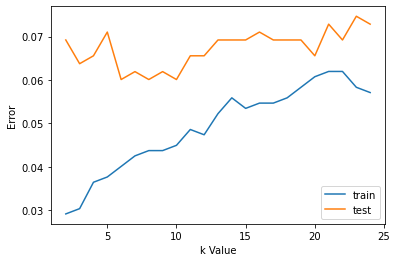

In [40]:
error1= []
error2= []
for k in range(2,25):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(2,25),error1,label="train")
plt.plot(range(2,25),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
print(error2, error1
     )
0.060109289617486336
0.060109289617486336

Automatically created module for IPython interactive environment


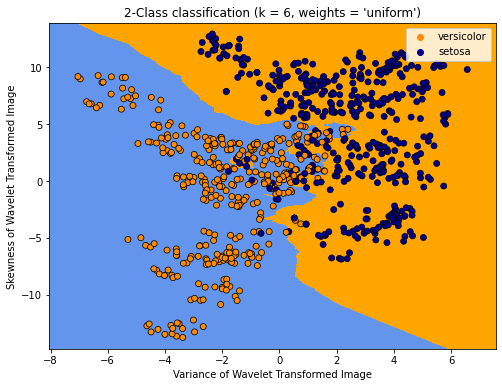

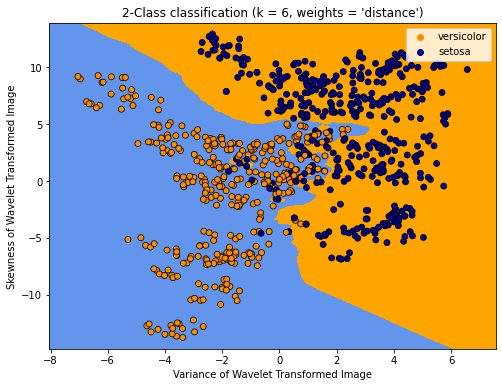

In [56]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange',  'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('Variance of Wavelet Transformed Image')
    plt.ylabel('Skewness of Wavelet Transformed Image')

plt.show()

[[-1.15428664 -0.24711725]] 0
[[-1.15428664 -0.24711725]] 1
[[-1.15428664 -0.24711725]] 2


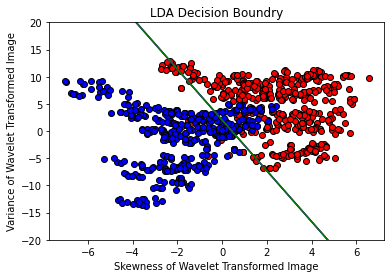

In [27]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#file_location="C:/Users/musta/Documents/football_data.xlsx"
#workbook = xlrd.open_workbook(file_location)
#first_sheet = workbook.sheet_by_index(0)
#r = first_sheet.nrows
#a = [first_sheet.cell_value(i, 0) for i in range(r)]
#b = [first_sheet.cell_value(i, 1) for i in range(r)]
#c = [first_sheet.cell_value(i, 2) for i in range(r)]
#d = [first_sheet.cell_value(i, 3) for i in range(r)]
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(X_train, y_train)
for l,c,m in zip(np.unique(y_train),['r','b','g'],['s','x','o']):
    plt.scatter(X_train[y_train==l,0],
                X_train[y_train==l,1],
                c=c, label=l,edgecolors='black')

x1 = np.array([np.min(X_train[:,0], axis=0), np.max(X_train[:,0], axis=0)])
for i, c in enumerate(['r','b','g']):
    print(lda.coef_, i)
    b, w1, w2 = lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]
    y1 = -(b+x1*w1)/w2    
    plt.ylim(-20, 20)
    plt.title('LDA Decision Boundry')
    plt.ylabel('Variance of Wavelet Transformed Image')
    plt.xlabel('Skewness of Wavelet Transformed Image')
    plt.plot(x1,y1,c=c)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = lda.predict(x_train)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Automatically created module for IPython interactive environment


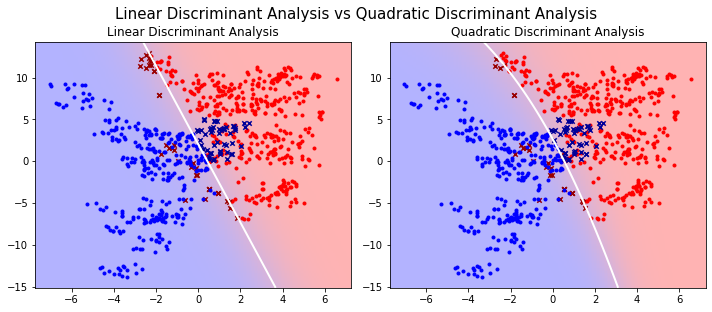

In [39]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    
    return X_train, y_train


def dataset_cov():
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    return splot




plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [48]:
y_pred = qda.fit(X_train, y_train).predict(X_train)

my_accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print(1 - my_accuracy)

0.09842041312272176


In [57]:
from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier(6, weights=weights)
scores = cross_val_score(clf, X, y, cv=5)
print(1-scores.mean(), scores.std())

0.05590539541759054 0.007183313070659117
